In [3]:
import requests
import pandas as pd
import ScraperExtend as scraper
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
import matplotlib.ticker as ticker 

**RDD Analysis:**


**List of Outcome Variables**
- PR Resolving Rate: # of PRs closed per month
- Review Time: Average time between PR Creation and merge
- Issue Resolving rate: # of issues resolved per month
- Issue Resolve Time: Average time taken to close issues
- Commit Frequency: # of commits per month

In [4]:
gh_api = scraper.ScraperExtend(os.getenv("GITHUB_PERSONAL_ACCESS_TOKEN"))
repo_name = 'tukaani-project/xz'

**Fetching Commit Dataset**

In [5]:
all_commits = gh_api.repo_commits(repo_name)
commits_df = pd.DataFrame(all_commits)
extracted_data = {
                'sha': commits_df['sha'],
                'author_name': commits_df['commit'].apply(lambda x: x.get('author', {}).get('name', 'Unknown')),
                'committer_name': commits_df['commit'].apply(lambda x: x.get('committer', {}).get('name', 'Unknown')),
                'author_date': commits_df['commit'].apply(lambda x: x.get('author', {}).get('date', 'Unknown')),
                'committer_date': commits_df['commit'].apply(lambda x: x.get('committer', {}).get('date', 'Unknown')),
                'commit_message': commits_df['commit'].apply(lambda x: x.get('message', 'Unknown')),
        }

commit_info_df = pd.DataFrame(extracted_data)

# Convert 'author_date' and 'committer_date' to datetime format
commit_info_df['author_date'] = pd.to_datetime(commit_info_df['author_date']).dt.strftime('%Y-%m-%d %H:%M:%S')
commit_info_df['committer_date'] = pd.to_datetime(commit_info_df['committer_date']).dt.strftime('%Y-%m-%d %H:%M:%S')
commit_info_df

,sha,author_name,committer_name,author_date,committer_date,commit_message
0,9f165076aebb3b5115d2b6520529db8fa11a6bdd,Lasse Collin,Lasse Collin,2025-02-07 17:12:03,2025-02-07 17:13:43,Docs: Update TODO a little
1,f5aa292c534f87b9dd588e667d1c65ed31e5f289,Lasse Collin,Lasse Collin,2025-02-07 16:50:56,2025-02-07 16:50:56,Add researcher credits of CVE-2022-1271 and CV...
2,7cf463b5add70e3fb48a10de3965c8beb6c01ad9,Lasse Collin,Lasse Collin,2025-02-07 16:43:00,2025-02-07 16:43:00,Update THANKS
3,6b7fe7e27b77038592e2c2e31df955059dda7d1d,Lasse Collin,Lasse Collin,2025-02-04 12:12:46,2025-02-04 17:37:32,"Docs: Update the ""Translations"" section in REA..."
4,2c7aee94936babf84b61b55420e503a0b2629ec1,Lasse Collin,Lasse Collin,2025-02-04 11:23:53,2025-02-04 17:37:31,debug/translations.bash: Revise a little\n\nMa...
...,...,...,...,...,...,...
2799,07ac881779a8477f2c1ab112b91a129e24aa743c,Lasse Collin,Lasse Collin,2007-12-09 15:06:45,2007-12-09 15:06:45,Take advantage of return_if_error() macro in m...
2800,41338717964f510ee61d70b25bd4c502ec9f77cf,Lasse Collin,Lasse Collin,2007-12-09 10:13:01,2007-12-09 10:13:01,Added a bunch of .lzma test files.
2801,ff946ceb7975d4f11950afd33f6315b4d20d1a03,Lasse Collin,Lasse Collin,2007-12-09 09:24:48,2007-12-09 09:24:48,Re-enabled the security checks in Subblock dec...
2802,2bf36d22d2c24ac3f488e63b35564fa2f6dab8d1,Lasse Collin,Lasse Collin,2007-12-09 09:03:28,2007-12-09 09:03:28,Fixed the tests to build with -Werror.


In [ ]:
commit_info_df.to_csv('commit_info.csv', index=False)
commit_info_df

,sha,author_name,committer_name,author_date,committer_date,commit_message
0,9f165076aebb3b5115d2b6520529db8fa11a6bdd,Lasse Collin,Lasse Collin,2025-02-07 17:12:03,2025-02-07 17:13:43,Docs: Update TODO a little
1,f5aa292c534f87b9dd588e667d1c65ed31e5f289,Lasse Collin,Lasse Collin,2025-02-07 16:50:56,2025-02-07 16:50:56,Add researcher credits of CVE-2022-1271 and CV...
2,7cf463b5add70e3fb48a10de3965c8beb6c01ad9,Lasse Collin,Lasse Collin,2025-02-07 16:43:00,2025-02-07 16:43:00,Update THANKS
3,6b7fe7e27b77038592e2c2e31df955059dda7d1d,Lasse Collin,Lasse Collin,2025-02-04 12:12:46,2025-02-04 17:37:32,"Docs: Update the ""Translations"" section in REA..."
4,2c7aee94936babf84b61b55420e503a0b2629ec1,Lasse Collin,Lasse Collin,2025-02-04 11:23:53,2025-02-04 17:37:31,debug/translations.bash: Revise a little\n\nMa...
...,...,...,...,...,...,...
2799,07ac881779a8477f2c1ab112b91a129e24aa743c,Lasse Collin,Lasse Collin,2007-12-09 15:06:45,2007-12-09 15:06:45,Take advantage of return_if_error() macro in m...
2800,41338717964f510ee61d70b25bd4c502ec9f77cf,Lasse Collin,Lasse Collin,2007-12-09 10:13:01,2007-12-09 10:13:01,Added a bunch of .lzma test files.
2801,ff946ceb7975d4f11950afd33f6315b4d20d1a03,Lasse Collin,Lasse Collin,2007-12-09 09:24:48,2007-12-09 09:24:48,Re-enabled the security checks in Subblock dec...
2802,2bf36d22d2c24ac3f488e63b35564fa2f6dab8d1,Lasse Collin,Lasse Collin,2007-12-09 09:03:28,2007-12-09 09:03:28,Fixed the tests to build with -Werror.


**Fetching Issues**

In [ ]:
all_issues = gh_api.repo_issues(repo_name)
issues_df = pd.DataFrame(all_issues)

extracted_data = {
                'issue_#': issues_df['number'],
                'state': issues_df['state'],
                'created_at': issues_df['created_at'],
                'updated_at': issues_df['updated_at'],
                'closed_at': issues_df['closed_at'],
                'title': issues_df['title'],
                'body': issues_df['body'],
                'url': issues_df['html_url'],
                'user': issues_df['user'].apply(lambda x: x.get('login', 'Unknown'))
        }

issues_info_df = pd.DataFrame(extracted_data)
issues_info_df['created_at'] = pd.to_datetime(issues_info_df['created_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
issues_info_df['updated_at'] = pd.to_datetime(issues_info_df['updated_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
issues_info_df['closed_at'] = pd.to_datetime(issues_info_df['closed_at']).dt.strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
issues_info_df.to_csv('issues_info.csv', index=False)
issues_info_df

,issue_#,state,created_at,updated_at,closed_at,title,body,url,user
0,164,open,2025-02-02 15:35:58,2025-02-02 16:01:25,NaN,hard link handling,I can understand the difficulty handling files...,https://github.com/tukaani-project/xz/issues/164,brianjmurrell
1,163,open,2025-02-02 14:39:26,2025-02-02 15:12:43,NaN,Shove xz into linux distro maintainers,We would like to propose taking advantage of l...,https://github.com/tukaani-project/xz/issues/163,SoniEx2
2,162,open,2025-02-01 00:33:27,2025-02-01 10:38:05,NaN,xz-5.6.4 scan reports trojans,Some Virusscanner reported issues and trojans ...,https://github.com/tukaani-project/xz/issues/162,netmaster4
3,161,open,2025-01-30 07:41:06,2025-01-30 18:53:26,NaN,Compiling with emscripten fails,Compiling with emscripten fails with:\n\n```\n...,https://github.com/tukaani-project/xz/issues/161,Maddimax
4,157,open,2024-12-15 16:32:12,2024-12-18 17:15:49,NaN,Compression ratio gets worse with level?,Given:\r\n```\r\nseq 0 10000000 | awk '{printf...,https://github.com/tukaani-project/xz/issues/157,nabijaczleweli
...,...,...,...,...,...,...,...,...,...
60,20,closed,2023-01-16 12:29:45,2023-01-16 14:34:57,2023-01-16 14:23:49,[Bug]: reject a valid lzma file,"### Describe the bug\n\nHi, I recently fuzz th...",https://github.com/tukaani-project/xz/issues/20,boofish
61,18,open,2023-01-12 16:27:27,2024-04-16 16:34:36,NaN,[Feature Request]: Create Windows CI Support,### Describe the Feature\n\nBoth MinGw and CMa...,https://github.com/tukaani-project/xz/issues/18,JiaT75
62,16,closed,2023-01-10 17:14:46,2023-01-11 14:54:17,2023-01-11 14:54:17,[Bug]: MacOS autotool build fails when -werror...,### Describe the bug\n\nThe CI/CD scripts dete...,https://github.com/tukaani-project/xz/issues/16,JiaT75
63,14,closed,2023-01-07 13:39:13,2023-01-16 13:37:39,2023-01-16 13:37:39,[Bug]: Inconsistent behavior with --format=raw...,### Describe the bug\n\nIf --format is set to ...,https://github.com/tukaani-project/xz/issues/14,JiaT75


**Fetching PRs**

In [ ]:
all_prs = gh_api.repo_pulls(repo_name)
prs_df = pd.DataFrame(all_prs)
extracted_data = {
                'pr_#': prs_df['number'],
                'state': prs_df['state'],
                'created_at': prs_df['created_at'],
                'updated_at': prs_df['updated_at'],
                'closed_at': prs_df['closed_at'],
                'merged_at' : prs_df['merged_at'],
                'title': prs_df['title'],
                'body': prs_df['body'],
                'url': prs_df['html_url'],
                'issue_url' : prs_df['issue_url'],
                'merge_sha' : prs_df['merge_commit_sha'],
                'user': prs_df['user'].apply(lambda x: x.get('login', 'Unknown'))
        }

prs_info_df = pd.DataFrame(extracted_data)
prs_info_df['created_at'] = pd.to_datetime(prs_info_df['created_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
prs_info_df['updated_at'] = pd.to_datetime(prs_info_df['updated_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
prs_info_df['closed_at'] = pd.to_datetime(prs_info_df['closed_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
prs_info_df['merged_at'] = pd.to_datetime(prs_info_df['merged_at']).dt.strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
prs_info_df.to_csv('prs_info.csv', index=False)
prs_info_df

,pr_#,state,created_at,updated_at,closed_at,merged_at,title,body,url,issue_url,merge_sha,user
0,165,closed,2025-02-03 23:07:45,2025-02-06 04:38:14,2025-02-06 04:37:38,NaN,Fixed typos and improved Polish translation cl...,Fixed typos and improved Polish translation cl...,https://github.com/tukaani-project/xz/pull/165,https://api.github.com/repos/tukaani-project/x...,883b5b46293af4f689a649c15ef5a972caa482e1,majevva
1,160,closed,2025-01-30 03:05:48,2025-01-30 18:27:58,2025-01-30 18:25:12,NaN,update fr.po,I added some translation so I was sure of the ...,https://github.com/tukaani-project/xz/pull/160,https://api.github.com/repos/tukaani-project/x...,0847354cad31ae52b3e16b9b1271eaa60536a9fb,femallet
2,159,closed,2024-12-27 08:21:32,2025-01-05 20:28:28,2025-01-04 08:52:23,NaN,xz: Add --synchronous,xz's default behavior is to delete the input f...,https://github.com/tukaani-project/xz/pull/159,https://api.github.com/repos/tukaani-project/x...,7ba6e83fa25f497e72ea9239b7c12b1f3d7a91a0,Larhzu
3,158,closed,2024-12-22 13:46:31,2024-12-22 18:44:01,2024-12-22 18:15:18,NaN,CMake: Disable unity builds project-wide,I have a project that uses xz via CMake's `Fet...,https://github.com/tukaani-project/xz/pull/158,https://api.github.com/repos/tukaani-project/x...,b15af38a0f8b28095193a9ed522eb60f70856a43,dextercd
4,155,closed,2024-12-08 17:27:05,2024-12-18 15:35:56,2024-12-18 15:31:59,NaN,liblzma: Fix incorrect macro name in a comment,Very minor thing but this tripped me up. The c...,https://github.com/tukaani-project/xz/pull/155,https://api.github.com/repos/tukaani-project/x...,23b33391c20ca241659e398625a5228ec54ca1fb,dextercd
...,...,...,...,...,...,...,...,...,...,...,...,...
85,5,closed,2022-12-28 13:50:28,2022-12-29 12:02:18,2022-12-28 18:12:48,2022-12-28 18:12:48,Mytime tweaks,## Pull request checklist\r\n\r\nPlease check ...,https://github.com/tukaani-project/xz/pull/5,https://api.github.com/repos/tukaani-project/x...,8566d3013e5a40c397fe0e897f3512131dba80d3,JiaT75
86,4,closed,2022-12-20 13:57:34,2023-01-19 16:51:13,2023-01-19 16:51:13,2023-01-19 16:51:13,Doxygen,## Pull request checklist\r\n\r\nPlease check ...,https://github.com/tukaani-project/xz/pull/4,https://api.github.com/repos/tukaani-project/x...,6327a045f34d48fc5afc58ba0d32a82c94403049,JiaT75
87,3,closed,2022-12-16 13:30:59,2022-12-20 14:05:28,2022-12-20 14:05:21,2022-12-20 14:05:21,Doxygen: Update .gitignore for generating docs...,"In source builds are not recommended, but we s...",https://github.com/tukaani-project/xz/pull/3,https://api.github.com/repos/tukaani-project/x...,30a6f5f5b8cfb94cf6227dce3b168d4d125b4fc6,JiaT75
88,2,closed,2022-12-16 13:11:03,2022-12-19 15:38:20,2022-12-19 15:38:12,2022-12-19 15:38:12,CMake: Update .gitignore for CMake artifacts f...,"In source builds are not recommended, but we c...",https://github.com/tukaani-project/xz/pull/2,https://api.github.com/repos/tukaani-project/x...,d6fed05468208ad481ba14cfaed29782632ca196,JiaT75


**RDD on Commit Frequency**
- Forcing Variable: Time (months since Jia Tan joined)
- Cutoff Date:      2022-10-28 (when Jia Tan got added to the Tukaani Organization)
- Treatment Group:  2022-10-28 to 2024-03-28
- Control Group:    2021-04-28 to 2022-10-27 (1.5 year before)
- Outcome Variable: Monthly commit frequency

**RDD Expectation:**
- If commit frequency significantly increased after Jia Tan joined, it suggests a potential correlation.
- A discontinuity (sharp increase/decrease in commits at the cutoff date) would indicate an effect.

In [7]:
maintainer_join_date = pd.to_datetime("2022-10-28")  # Jia Tan's maintainer join date
attack_detected_date = pd.to_datetime("2024-03-28")  # Detection of attack
control_start_date = maintainer_join_date - pd.DateOffset(months=18)  # 1.5 years before


# filter dataset to only include control and treatment period commits
commit_info_df["committer_date"] = pd.to_datetime(commit_info_df["committer_date"], errors="coerce")
commit_info_df = commit_info_df[(commit_info_df["committer_date"] >= control_start_date) & (commit_info_df["committer_date"] <= attack_detected_date)]

commit_info_df.to_csv('commit_info_filtered.csv', index=False)

/var/folders/4y/5xhzlmc1239f66mbkg4yyqrh0000gn/T/ipykernel_2064/2359282930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commit_info_df["committer_date"] = pd.to_datetime(commit_info_df["committer_date"], errors="coerce")


In [ ]:

# calculate months and weeks since maintainer join date
commit_info_df["months_since_JT_joined"] = ((commit_info_df["committer_date"] - maintainer_join_date) / pd.Timedelta(days=30)).astype(int)
commit_info_df["weeks_since_JT_joined"] = ((commit_info_df["committer_date"] - maintainer_join_date) / pd.Timedelta(days=7)).astype(int)


# calculate monthly and weekly commit frequency
monthly_commits = commit_info_df.groupby("months_since_JT_joined").size().reset_index(name="commit_count")
weekly_commits = commit_info_df.groupby("weeks_since_JT_joined").size().reset_index(name="commit_count")

# label treatment and control group (1 for treatment, 0 for control)
monthly_commits["treatment"] = (monthly_commits["months_since_JT_joined"] >= 0).astype(int)
weekly_commits["treatment"] = (weekly_commits["weeks_since_JT_joined"] >= 0).astype(int)

In [ ]:
# linear regression model
X = monthly_commits[["months_since_JT_joined", "treatment"]]
y = monthly_commits["commit_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# predict commit count for visualization
monthly_commits["predicted_commit_count"] = linear_model.predict(X)



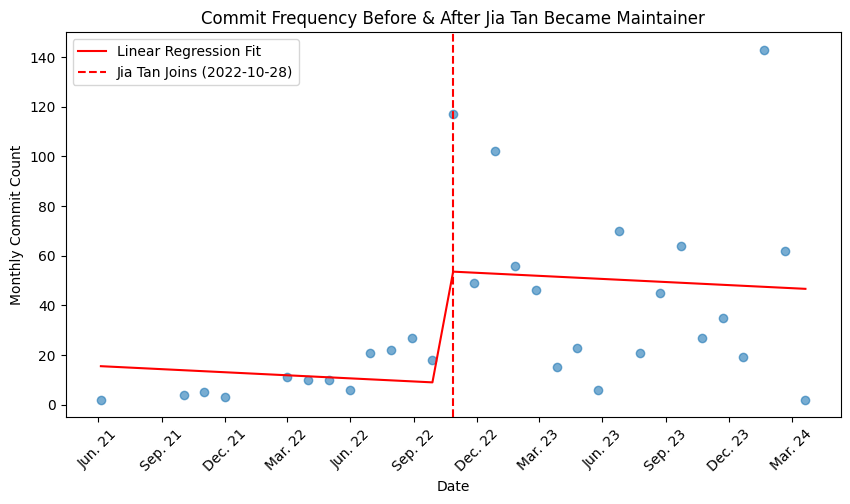

In [ ]:
monthly_commits["date"] = maintainer_join_date + pd.to_timedelta(monthly_commits["months_since_JT_joined"] * 30, unit="D")

plt.figure(figsize=(10, 5))
plt.scatter(monthly_commits["date"], monthly_commits["commit_count"], alpha=0.6)
plt.plot(monthly_commits["date"], monthly_commits["predicted_commit_count"], color="red", label="Linear Regression Fit")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))  # Format as "Nov-23"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show labels every 3 months

plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Monthly Commit Count")
plt.title("Commit Frequency Before & After Jia Tan Became Maintainer")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend()
plt.show()

In [ ]:
# linear regression model
X = weekly_commits[["weeks_since_JT_joined", "treatment"]]
y = weekly_commits["commit_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# predict commit count for visualization
weekly_commits["predicted_commit_count"] = linear_model.predict(X)


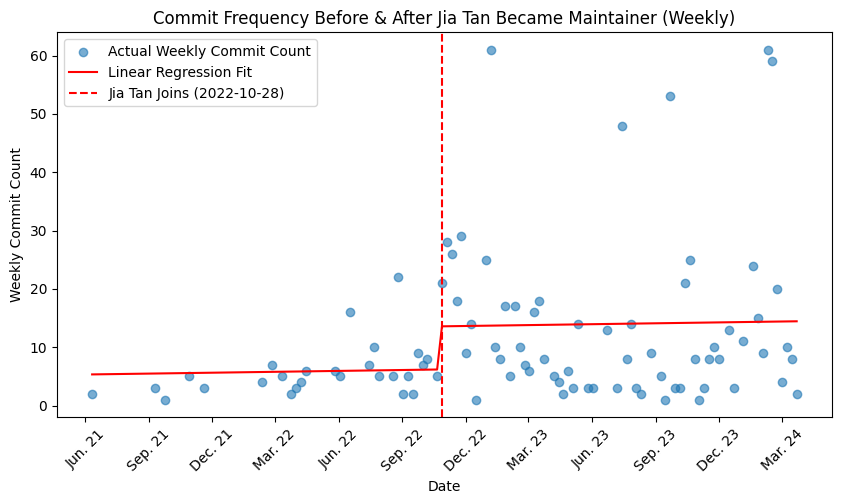

In [ ]:

weekly_commits["date"] = maintainer_join_date + pd.to_timedelta(weekly_commits["weeks_since_JT_joined"] * 7, unit="D")


plt.figure(figsize=(10, 5))
plt.scatter(weekly_commits["date"], weekly_commits["commit_count"], alpha=0.6, label="Actual Weekly Commit Count")
plt.plot(weekly_commits["date"], weekly_commits["predicted_commit_count"], color="red", label="Linear Regression Fit")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))  # Format as "Oct-22"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

plt.xlabel("Date")
plt.ylabel("Weekly Commit Count")
plt.title("Commit Frequency Before & After Jia Tan Became Maintainer (Weekly)")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend()
plt.show()


**RDD on PR Resolve Frequency**
- Forcing Variable: Time (months since Jia Tan joined)
- Cutoff Date:      2022-10-28 (when Jia Tan got added to the Tukaani Organization)
- Treatment Group:  2022-10-28 to 2024-03-28
- Control Group:    2021-04-28 to 2022-10-27 (1.5 year before)
- Outcome Variable: Monthly PR resolve frequency

**RDD Expectation:**
- If PR resolve frequency significantly increased after Jia Tan joined, it suggests a potential correlation.
- A discontinuity would indicate an effect.

In [ ]:
prs_info_df["created_at"] = pd.to_datetime(prs_info_df["created_at"], errors="coerce")
prs_info_df["closed_at"] = pd.to_datetime(prs_info_df["closed_at"], errors="coerce")

prs_info_df = prs_info_df[(prs_info_df["state"] == "closed")]

prs_info_df = prs_info_df[
    (prs_info_df["created_at"] >= control_start_date) & 
    (prs_info_df["created_at"] <= attack_detected_date) &
    (prs_info_df["closed_at"] <= attack_detected_date)  # Ensure PRs were closed within the period
]

prs_info_df["months_since_JT_joined"] = (prs_info_df["closed_at"] - maintainer_join_date) / pd.Timedelta(days=30)
prs_info_df = prs_info_df.dropna(subset=["months_since_JT_joined"])  # Drop NaN rows
prs_info_df["months_since_JT_joined"] = prs_info_df["months_since_JT_joined"].astype(int)

prs_info_df["weeks_since_JT_joined"] = (prs_info_df["closed_at"] - maintainer_join_date) / pd.Timedelta(days=7)
prs_info_df = prs_info_df.dropna(subset=["weeks_since_JT_joined"])  # Drop NaN rows
prs_info_df["weeks_since_JT_joined"] = prs_info_df["weeks_since_JT_joined"].astype(int)

monthly_pr_closed = prs_info_df.groupby("months_since_JT_joined").size().reset_index(name="pr_closed_count")
monthly_pr_closed["treatment"] = (monthly_pr_closed["months_since_JT_joined"] >= 0).astype(int)

weekly_pr_closed = prs_info_df.groupby("weeks_since_JT_joined").size().reset_index(name="pr_closed_count")
weekly_pr_closed["treatment"] = (weekly_pr_closed["weeks_since_JT_joined"] >= 0).astype(int)

In [ ]:
X = monthly_pr_closed[["months_since_JT_joined", "treatment"]]
y = monthly_pr_closed["pr_closed_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

monthly_pr_closed["predicted_pr_closed_count"] = linear_model.predict(X)


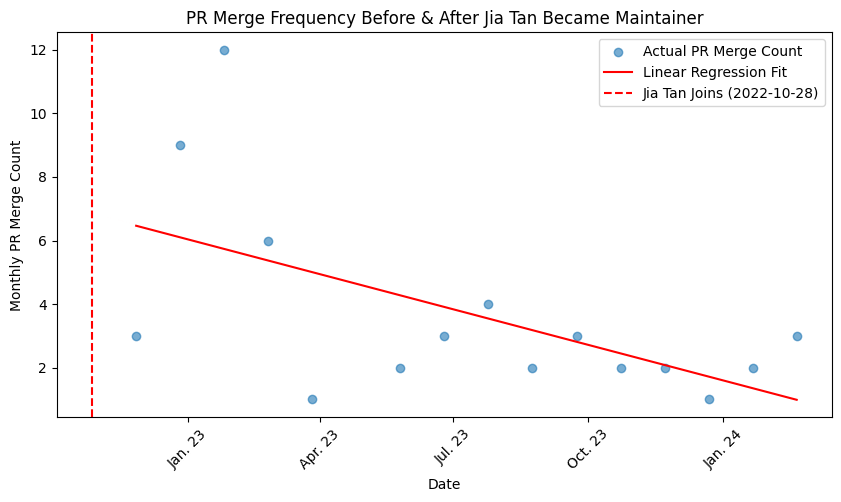

In [ ]:
monthly_pr_closed["date"] = maintainer_join_date + pd.to_timedelta(monthly_pr_closed["months_since_JT_joined"] * 30, unit="D")

plt.figure(figsize=(10, 5))
plt.scatter(monthly_pr_closed["date"], monthly_pr_closed["pr_closed_count"], alpha=0.6, label="Actual PR Merge Count")
plt.plot(monthly_pr_closed["date"], monthly_pr_closed["predicted_pr_closed_count"], color="red", label="Linear Regression Fit")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))  
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  

plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

plt.xlabel("Date")
plt.ylabel("Monthly PR Merge Count")
plt.title("PR Merge Frequency Before & After Jia Tan Became Maintainer")
plt.xticks(rotation=45) 
plt.legend()
plt.show()


In [ ]:
# linear regression model
X = weekly_pr_closed[["weeks_since_JT_joined", "treatment"]]
y = weekly_pr_closed["pr_closed_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# predict commit count for visualization
weekly_pr_closed["predicted_pr_closed_count"] = linear_model.predict(X)


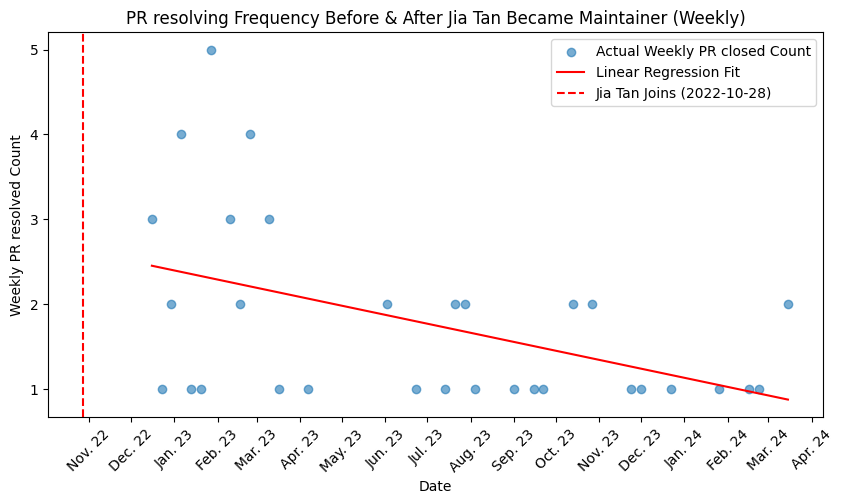

In [ ]:
weekly_pr_closed["date"] = maintainer_join_date + pd.to_timedelta(weekly_pr_closed["weeks_since_JT_joined"] * 7, unit="D")

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(weekly_pr_closed["date"], weekly_pr_closed["pr_closed_count"], alpha=0.6, label="Actual Weekly PR closed Count")
plt.plot(weekly_pr_closed["date"], weekly_pr_closed["predicted_pr_closed_count"], color="red", label="Linear Regression Fit")

# Formatting the x-axis labels for weekly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))  # Format as "Oct-22"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Cutoff marker for when Jia Tan joined
plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Weekly PR resolved Count")
plt.title("PR resolving Frequency Before & After Jia Tan Became Maintainer (Weekly)")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend()
plt.show()


**RDD on Issue Resolve Frequency**
- Forcing Variable: Time (months since Jia Tan joined)
- Cutoff Date:      2022-10-28 (when Jia Tan got added to the Tukaani Organization)
- Treatment Group:  2022-10-28 to 2024-03-28
- Control Group:    2021-04-28 to 2022-10-27 (1.5 year before)
- Outcome Variable: Monthly Issue resolve frequency

**RDD Expectation:**
- If issue resolve frequency significantly increased after Jia Tan joined, it suggests a potential correlation.
- A discontinuity would indicate an effect.

In [ ]:
issues_info_df["created_at"] = pd.to_datetime(issues_info_df["created_at"], errors="coerce")
issues_info_df["closed_at"] = pd.to_datetime(issues_info_df["closed_at"], errors="coerce")

issues_info_df = issues_info_df[(issues_info_df["state"] == "closed")]
issues_info_df = issues_info_df[
    (issues_info_df["created_at"] >= control_start_date) & 
    (issues_info_df["created_at"] <= attack_detected_date) &
    (issues_info_df["closed_at"] <= attack_detected_date)  # Ensure issues were closed within the period
]

issues_info_df["months_since_JT_joined"] = (issues_info_df["created_at"] - maintainer_join_date) / pd.Timedelta(days=30)
issues_info_df["weeks_since_JT_joined"] = (issues_info_df["created_at"] - maintainer_join_date) / pd.Timedelta(days=7)

issues_info_df = issues_info_df.dropna(subset=["months_since_JT_joined"])
issues_info_df = issues_info_df.dropna(subset=["weeks_since_JT_joined"])

issues_info_df["months_since_JT_joined"] = issues_info_df["months_since_JT_joined"].astype(int)
issues_info_df["weeks_since_JT_joined"] = issues_info_df["weeks_since_JT_joined"].astype(int)

monthly_issues_closed = issues_info_df.groupby("months_since_JT_joined").size().reset_index(name="issue_closed_count")
weekly_issues_closed = issues_info_df.groupby("weeks_since_JT_joined").size().reset_index(name="issue_closed_count")

monthly_issues_closed["treatment"] = (monthly_issues_closed["months_since_JT_joined"] >= 0).astype(int)
weekly_issues_closed["treatment"] = (weekly_issues_closed["weeks_since_JT_joined"] >= 0).astype(int)

In [ ]:
X = monthly_issues_closed[["months_since_JT_joined", "treatment"]]
y = monthly_issues_closed["issue_closed_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

monthly_issues_closed["predicted_issue_closed_count"] = linear_model.predict(X)


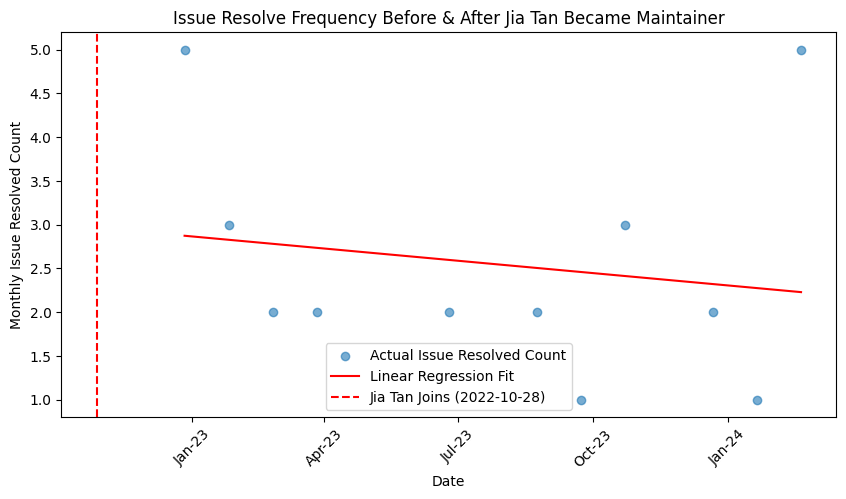

In [ ]:
monthly_issues_closed["date"] = maintainer_join_date + pd.to_timedelta(monthly_issues_closed["months_since_JT_joined"] * 30, unit="D")

plt.figure(figsize=(10, 5))
plt.scatter(monthly_issues_closed["date"], monthly_issues_closed["issue_closed_count"], alpha=0.6, label="Actual Issue Resolved Count")
plt.plot(monthly_issues_closed["date"], monthly_issues_closed["predicted_issue_closed_count"], color="red", label="Linear Regression Fit")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%y")) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 

plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

plt.xlabel("Date")
plt.ylabel("Monthly Issue Resolved Count")
plt.title("Issue Resolve Frequency Before & After Jia Tan Became Maintainer")
plt.xticks(rotation=45)  
plt.legend()
plt.show()


Issues

In [ ]:
# linear regression model
X = weekly_issues_closed[["weeks_since_JT_joined", "treatment"]]
y = weekly_issues_closed["issue_closed_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# predict commit count for visualization
weekly_issues_closed["predicted_issue_closed_count"] = linear_model.predict(X)


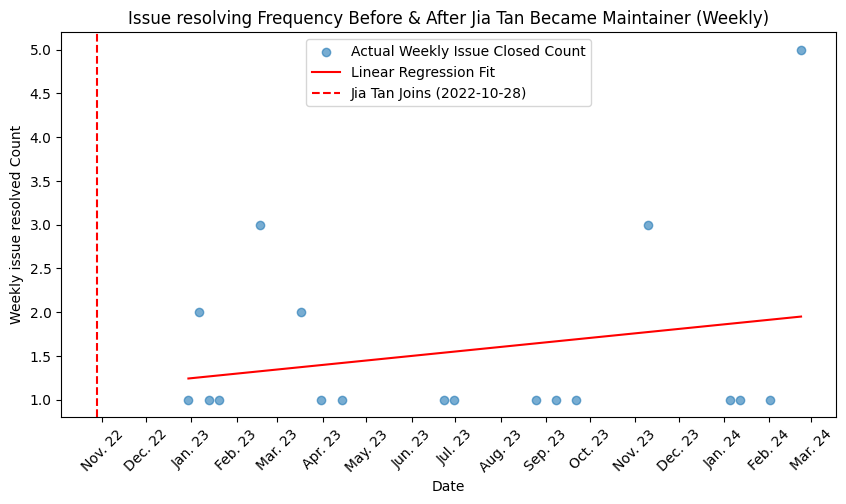

In [ ]:
weekly_issues_closed["date"] = maintainer_join_date + pd.to_timedelta(weekly_issues_closed["weeks_since_JT_joined"] * 7, unit="D")

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(weekly_issues_closed["date"], weekly_issues_closed["issue_closed_count"], alpha=0.6, label="Actual Weekly Issue Closed Count")
plt.plot(weekly_issues_closed["date"], weekly_issues_closed["predicted_issue_closed_count"], color="red", label="Linear Regression Fit")

# Formatting the x-axis labels for weekly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))  # Format as "Oct-22"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Cutoff marker for when Jia Tan joined
plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Weekly issue resolved Count")
plt.title("Issue resolving Frequency Before & After Jia Tan Became Maintainer (Weekly)")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend()
plt.show()
